In [3]:
#!/usr/bin/env python
import matplotlib
%matplotlib inline

import util
import os
import numpy as np
import scipy
dname = 'sample2'
# fname = 'sample'
flst = os.listdir(dname)
# bname = flst[0]
for bname in flst:

    fname = os.path.join(*[dname,bname])
    # print fname
    # ali = 'valleys'
    ali = 'freqs_abs'
    ali = 'freqs'

    # thres = 0.05
    # ali = 'valleys_%d' % thres

    # ali = 'comp_256'
    p = util.piece( fname, alias = ali)
    p.set_wavelet('morlet')
    p.set_pdir('gallery2/')
    # p.plot(0,0.05, scale = np.arange(1,80))
    # p.plot(0,0.05, scale = np.arange(1,129))
    # scale = np.arange(25,175)

    # freqs = p.bitrate * np.power(10,np.linspace(1.5,4.3,60))
    # scale = p.bitrate / freqs 
    omega = 25
    logfmin = np.log10( p.bitrate / omega )
    logfmax = np.log10( 20. / omega )

    freqs = np.power(10, np.linspace( logfmin, logfmax,100))
    scale = 1./ freqs
    # scale = np.linspace(15,500,100)
    tmin = 10.
    tmax = 10.05
    coef, freqs = p.cwt( tmin, tmax, scale, p = omega )
    # pks  = util.detect_peaks( - np.log10( 1 + 10*abs(coef)), ry = 20 )

    im = np.log10( 1 + 10 * abs(coef))
#     break 
    p.plot( tmin, tmax, scale = scale
        , coef = im
        , log  = 0
        , show = 0
        , save = 1
        # , coef = coef
        )

In [4]:
# coef, freqs = p.cwt( tmin, tmax, scale, p = omega )
# coef.T[0].shape
np.concatenate(coef).shape

(220500,)

In [5]:
dname = 'sample1'
bname = 'Track 1.wav'
fname = os.path.join(*[dname,bname])
# print fname
# ali = 'valleys'
ali = 'freqs_abs'
ali = 'freqs'
# thres = 0.05
# ali = 'valleys_%d' % thres
# ali = 'comp_256'
p = util.piece( fname, alias = ali)
p.set_wavelet('morlet')
p.set_pdir('gallery1/')
# p.plot(0,0.05, scale = np.arange(1,80))
# p.plot(0,0.05, scale = np.arange(1,129))
# scale = np.arange(25,175)

# freqs = p.bitrate * np.power(10,np.linspace(1.5,4.3,60))
# scale = p.bitrate / freqs 
omega = 25
logfmin = np.log10( p.bitrate / omega )
logfmax = np.log10( 50 / omega )

freqs = np.power(10, np.linspace( logfmin, logfmax,100) )
scale = 1./ freqs
# scale = np.linspace(15,500,100)
tmin = 10.
tmax = 17.5
coef, freqs = p.cwt( tmin, tmax, scale, p = omega )
# pks  = util.detect_peaks( - np.log10( 1 + 10*abs(coef)), ry = 20 )

im = np.log10( 1 + 10*abs(coef))

In [6]:
for ri,si in zip(coef,scale):
    print si
    ri
    break

0.000566893424036


In [17]:
coef[0]

array([-27.65018258+27.46267437j, -37.83639843 -8.97510194j,
       -12.30426626-36.72772184j, ...,  30.00596078-24.63997051j,
        36.85521653+12.56931934j,   8.75347052+37.99297246j])

In [ ]:
# import 
# matplotlib.pyplot

In [41]:
im1 = scipy.ndimage.gaussian_filter(im, [2,1])
ft = p.freqs[np.argmax(im1, axis = 0)]
# ft = p.freqs[np.argmax(im, axis = 0)]

In [ ]:
0.2*numpy.sin(2*numpy.pi*f0*n/float(sr))

In [7]:
p.play()

<source src="data:audio/wav;base64,UklGRiAYCgBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YfwXCgDLDAINPg1vDX8Nkw2QDYsNeg10DUcNFQ3QDJgMcwwIDK4LDgunCikKwwmJCVwJRgk8CVcJYQl4CWQJPgnsCI8IJwjRB4EHJwfrBpEGRwbRBWAFtAQKBGwD8gJ5AhoCtgFuAUYBAgG9ADgApf/d/hL+VP2M/PH7Y/sW++H6y/qs+m76FPq0+Tz5zPhc+Nn3Q/eB9sj15vRD9JTzC/Oq8oLyrvLq8ivze/Pf8zX0afR29IT0e/SH9JT05PQp9ZX1vvX59SH2QvZJ9iH21PV/9S71tPRS9OTzlPNv807zYvN087XzyfPv8/bz5/Oc80nz6PKR8jvy//HO8bfxxPHX8Q/yL/Jy8p/ykfJ88hvytfEU8X7ww+8879Puje5l7mDuq+4A73/v5u9l8Ljw/PAD8cfwQ/Cx7yLvue5R7hruD+4t7oDu++597/TvYfDE8DjxnvEF8mjyw/JJ89bzbvQb9dL1hvZN9/r3tfhi+fH5f/rk+nL74vsp/Gr8o/z4/Gb96P2X/lP/MAAUAQsC2AJ0AwkEcATHBAgFVwV3BasF1gUABiEGMAYmBg0GxQWJBUQFFQX1BPkECAUrBVcFagVhBSEF8ASvBIcEYwRjBGkEkQS+BPAEJgU7BVQFOgUwBQYF9AS7BHUE8QNYA78COQK2AVMBAAH4ACABggHeAVYCugIaA2oDrQPEA7QDmwOgA7wD8wMdBEAEZgSYBNwEEgU/BTsFPQU1BSYFEgX0BNsEvgS+BM8E/wQpBU8FdwWkBaYFogV6BVcFPQUVBdEEhgQqBMkDeAMfA+ACpAKDAmgCTQIuAvIBqAEeAZ4ACACY/yP/x/5v/m3+gP6h/vH+Of+E/6//zf+v/6z/Ov/2/pX+d/5O/kf+VP6a/v3+bv/e/zMAkADiACoBdQGvAdoBFgJFAokCtQLqAgMDFwMDAwAD6ALnAsQCugKuAtQC1ALoAvQC+wIVAyEDZQOWA+QDPAS9BDoF5QVgBsEGDgdBB1kHTwcxB/UGuQaABj8G7QWdBTgF1wSEBGEEXAR6BKQE6wREBU8FSQUIBbsEUgQJBLUDhwNYA0cDRANCAy0DFQPoArECcgIfAgYC7QHBAXsBKgHLAIEAQgAOAAAAKwBtAOUATgHaAXICCwOwAzkEvgQ4BZAF7wVbBsQGOQebB/IHXgjHCFcJuwk5CoMK6gorC4ULjQu3C7ILrguyC78L2gvzCwAMEgwSDP0LyQuaC1kLJgvXCpoKQwoOCukJvAmbCXgJUAkcCdUIfAg/CNQHXgerBhkGfAX5BG4E+AOgA3QDggOIA7QD2gPkA+kDxgNqAwADcALZAVcB0QByABgAFwAVAF4AnwD2ADABZgGKAacBtgHAAbYBvgHZAdoB3wHDAbYBjwGCAV0BMgH+AL0AmQBiAFMAGAD//9L/1f/I/+H/5v/r/wAAFwBYAIAAugDJANsAyQCuAHQAFQCi/xz/n/73/WP9nvzi+xj7d/rf+ZL5WPlM+Ub5WPkw+d74a/jS9xb3hfb09XD1FfWy9I70a/Rw9FD0QfQZ9ODzlPNW8/ryovIU8orxz/Aq8G7v4u5W7hTu3u3d7d7tGe5E7nvuqO7T7u7uG+8e7znvWe+M79fvLPBh8Kbw4PBM8Z7xzvHY8enx5/Hf8drx1fHB8brxqvG/8fbxNPKH8tnyQvOm8wf0PPR29Jn0wfTk9OP01fTa9Mj0yPS39Jn0jPRm9Fz0OvRE9C30BfTG84jzZ/M18yfzIfNT86jz+/Ns9Nz0Q/Wn9f71P/aD9sb2DPdD9473y/c7+Kz4PPn6+bz6bfsU/MH8d/1K/hn/8P+4ALkBrgK1A5gEagUGBqUG5gYvBzsHSwctBy8HLAdKB2MHiwfSBx8IewizCP0IKwlNCXMJtgkVCoYK4Ao6C5ALzAsSDCgMOgxDDDQM+wueCxoLkwoOCnsJLwn0CPMIHglXCYAJqAmOCVcJ7gh7CAsInwdNBxMH9gb4BgIHCQcABwAHAAfVBqgGdAZCBuoFlQUsBaQEDgSHAy4D4wLFAqYCvwLiAisDewPpA0MEegTPBAsFRQVPBXoFsQXxBSMGRwZvBpsGyQb2BjQHXAeGB58HpQeWB3IHTQf/BuEGowabBogGtwbVBv0GNgdPB2gHQAcKB6EGMAarBUIF1AR3BCwE0gOeA1gDSwMpAwMDqQJNAuEBXAHlAHQALgDc/7L/m/+8/+b/CQAYACYACADB/2n/Bf+o/jb+9/2l/Z/9lv22/ev9Yv75/mn/z/8IAFsAngD4ACoBcAGqAf0BQwLEAgsDcwOwAxQEXASOBLYEwgTMBMcEzwTUBM8EvQTUBNsE9wQSBRcFHAUsBUkFcAV/BZgFpwWxBaYFfAVXBUoFRQUQBe0EpwRrBBMEvwNVAwsDxQKfAr8C7QJEA30DpQOWA48DVgMzAwUDCgMmA2cDqgPxA0YEfASnBIsEiQRIBDkEBATuA+YD0AOmA1YD9gKmAoYCagJ1AoEC6AJHA8sDIgSHBN4EHwVXBXwFmAWGBYQFgwV6BWUFTAVTBWYFcgWBBbEFugXvBfIFCgb7BfcFBgYLBhQGCAYpBi4GTgZbBnQGbgZRBgEGnQUQBYEE/wOKAxoDogI9AtkBeAEAAZQAPQDw/5j/Of+8/if+qv00/dP8Tvzb+2b7KfvI+qf6ZPpI+hn63fm8+V35FPnR+KH4ZfhP+D74R/hW+J/40fgj+Tz5Rvk/+WD5fvm0+fX5Pvqq+vj6T/te+3/7bftw+1T7NPv1+qD6Xvoq+hP68fkF+v/5IPox+ln6ZPpL+gD6rfk3+db4b/gY+O73y/e594X3bPcj9/j2qfY69sD1RfWg9NvzNfN98gzynvF58XTxkvGy8c3x1/Gh8WLx/PC48H7wdfB68NHwIfGb8dDxEfIb8iPyHvIn8izyGfLx8bTxU/HR8Ezw1O9w71Dvfe/b71Tw6vCS8SLynfIJ82XzrfPg8wf0U/R/9MP06PQE9R31QPVX9Yf18PVP9sH2Fvda95H3t/fP9+T3Gvhe+NH4Pfm0+SX6wPp0+wb8tPxG/dL9OP57/nb+Y/4w/vD9zP2x/bn94P0w/oX++P48/4r/lP+C/1f/Tf8//xb/Df8M/0j/kf/j/w0AewC6APEAGQEyATwBWAFuAbQBAgJvAtYCUwP1A7YEgQUIBngG+wZwB/IHdggDCZgJWwoJC9ULXAwLDYkN/g1bDoUOlA6lDrUO6w4dD1wPqQ/rDxUQQxBrEFYQTRA4EDQQDBDyD+AP8A8WECcQLxAQEN4Pnw+OD3cPNA//Do8OMg6YDRYNmQw8DMcLigtnCzMLBgumClIK5AmZCUsJDQnfCLUI0wgACTcJZwlzCXYJQwkDCbUIfggrCPUHnwc8B9IGQQazBU4F4wSHBDsE4gO5A8gD9QMYBGEEmwT6BFEFpgXeBRoGKwYZBgoGwAWOBSsF/ATSBLsEjgSaBJgElQSHBG4EHgTcA5YDVgMmA/QCDQMKAxUDCwMyAygDMAMpA/4CuAJ3AgcCsQFXAfkAswCNAGMADgDr/7T/qv+j/2v/If/4/tb+v/6y/oj+T/5Z/j/+BP7D/XP9Bf2m/Eb8FPzW+8T7lfum++D7CPwt/Cn8P/wP/Pv7zPuw+8774/sX/H380Pxu/RL+zv6K/2IA7wCKAekBLwIiAgkCsgFzASUBAgEHAT8BmwFcAhIDowPwAyMELQTiA5IDOAMSAwADPANLA6gD/QM3BE8EcgSRBJoEbgQOBJsDBgNXAnoBrgD6/8P/f/9w/07/X/9Q/1//Tv9X/1L/MP8y/0T/f/+o/+T/LACeAOoABQHqAN0AqwBvABoAvv9s/xH/tf4//t79p/18/Yf9yv1o/gr/m/8kALIADAEbAd8ApAByABoAyv97/z7/8/6e/lT+JP4I/v/9Df5d/

In [8]:
def generate_sine(f0, sr, ):
    n_dur = len(f0)
    n = np.arange(n_dur)
    return 0.2*np.sin(2*np.pi*f0*n/float(sr))
xre = generate_sine(ft,p.bitrate)
import IPython.display as ipd
ipd.Audio(xre, rate = p.bitrate)

NameError: name 'ft' is not defined

In [16]:
def estimate_pitch_and_generate_sine(x, onset_samples, i, sr):
    return generate_sine(f0, sr, n1-n0)

In [17]:
numpy.concatenate([
    estimate_pitch_and_generate_sine(x, onset_boundaries, i, sr=sr)
    for i in range(len(onset_boundaries)-1)
])

NameError: name 'numpy' is not defined

NameError: name 'onset_times' is not defined

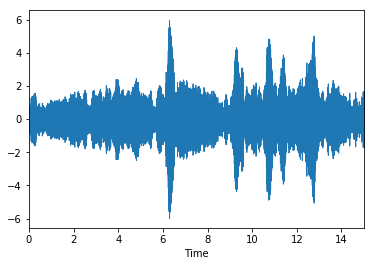

In [18]:
import librosa, librosa.display
import matplotlib.pyplot as plt
librosa.display.waveplot( p.xs/np.std(p.xs), sr= p.bitrate/2)
plt.vlines(onset_times, -1, 1, color='r')

In [19]:
dname = 'sample1'
bname = 'Track 1.wav'
fname = os.path.join(*[dname,bname])
# print fname
# ali = 'valleys'
ali = 'freqs_abs'
ali = 'freqs'
# thres = 0.05
# ali = 'valleys_%d' % thres
# ali = 'comp_256'
p = util.piece( fname, alias = ali)
p.set_wavelet('morlet')
p.set_pdir('gallery1/')
# p.plot(0,0.05, scale = np.arange(1,80))
# p.plot(0,0.05, scale = np.arange(1,129))
# scale = np.arange(25,175)

# freqs = p.bitrate * np.power(10,np.linspace(1.5,4.3,60))
# scale = p.bitrate / freqs 
omega = 25
logfmin = np.log10( p.bitrate / omega )
logfmax = np.log10( 50 / omega )

freqs = np.power(10, np.linspace( logfmin, logfmax,100) )
scale = 1./ freqs
# scale = np.linspace(15,500,100)
tmin = 10.
tmax = 17.5
coef, freqs = p.cwt( tmin, tmax, scale, p = omega )
# pks  = util.detect_peaks( - np.log10( 1 + 10*abs(coef)), ry = 20 )

im = np.log10( 1 + 10*abs(coef))

In [20]:
x = p.xs/np.std(p.xs)
sr = p.bitrate
import numpy

(0, 3308)

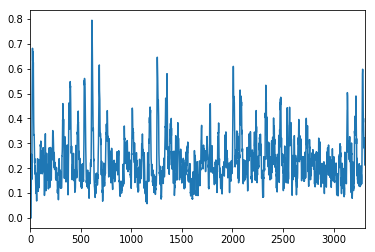

In [49]:
%matplotlib inline
hop_length = 100
onset_env = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length)
plt.plot(onset_env)
plt.xlim(0, len(onset_env))

In [50]:
onset_samples = librosa.onset.onset_detect(x,
                                           sr=sr, units='samples', 
                                           hop_length=hop_length, 
                                           backtrack=False,
                                           pre_max=20,
                                           post_max=20,
                                           pre_avg=100,
                                           post_avg=100,
                                           delta=0.2,
                                           wait=0)

In [27]:
onset_boundaries = numpy.concatenate([[0], onset_samples, [len(x)]])
print onset_boundaries
onset_times = librosa.samples_to_time(onset_boundaries, sr=sr)
print onset_times

NameError: name 'onset_samples' is not defined

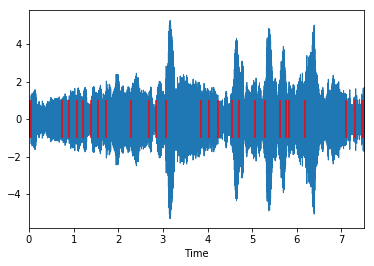

In [58]:
librosa.display.waveplot(x, sr=sr)
plt.vlines(onset_times, -1, 1, color='r')

In [13]:
def estimate_pitch(segment, sr, fmin=50.0, fmax=2000.0):
    
    # Compute autocorrelation of input segment.
    r = librosa.autocorrelate(segment)
    
    # Define lower and upper limits for the autocorrelation argmax.
    i_min = sr/fmax
    i_max = sr/fmin
    r[:int(i_min)] = 0
    r[int(i_max):] = 0
    
    # Find the location of the maximum autocorrelation.
    i = r.argmax()
    f0 = float(sr)/i
    return f0
def generate_sine(f0, sr, n_duration):
    n = numpy.arange(n_duration)
    return 0.2*numpy.sin(2*numpy.pi*f0*n/float(sr))    
def estimate_pitch_and_generate_sine(x, onset_samples, i, sr):
    n0 = onset_samples[i]
    n1 = onset_samples[i+1]
    f0 = estimate_pitch(x[n0:n1], sr)
    return generate_sine(f0, sr, n1-n0)

In [26]:
y = numpy.concatenate([
    estimate_pitch_and_generate_sine(x, onset_boundaries, i, sr=sr)
    for i in range(len(onset_boundaries)-1)
])

NameError: name 'onset_boundaries' is not defined

In [15]:
ipd.Audio(x, rate=sr)

NameError: name 'ipd' is not defined

In [65]:
ipd.Audio(y, rate=sr)

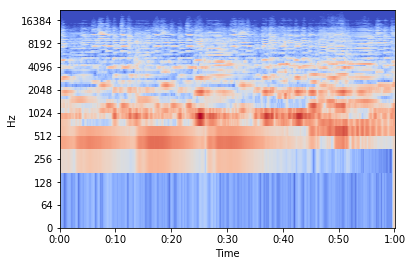

In [25]:
# hop_length = 512
# n_fft = 2048
# X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
# S = np.log10(abs(X)**2)
# librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')

S = librosa.feature.melspectrogram(x, sr=sr, n_fft=2*2048, hop_length=1024/(2**4))
logS = librosa.logamplitude(S)
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')

In [115]:
mlpywt.wave()

AttributeError: 'module' object has no attribute 'wave'

In [113]:
import mlpy.wavelet as mlpywt
help(mlpywt.wave)

Help on package mlpy.wavelet in mlpy:

NAME
    mlpy.wavelet - Wavelet transform

FILE
    /media/DATA/Documents/repos/music/local/lib/python2.7/site-packages/mlpy/wavelet/__init__.py

PACKAGE CONTENTS
    _dwt
    _uwt
    continuous
    padding
    uwt_align

FUNCTIONS
    autoscales(N, dt, dj, wf, p)
        Compute scales as fractional power of two.
        
        :Parameters:
           N : integer
              number of data samples
           dt : float
              time step
           dj : float
              scale resolution (smaller values of dj give finer resolution)
           wf : string
              wavelet function ('morlet', 'paul', 'dog')
           p : float
              omega0 ('morlet') or order ('paul', 'dog')
        
        :Returns:
           scales : 1d numpy array
              scales
    
    cwt(x, dt, scales, wf='dog', p=2)
        Continuous Wavelet Tranform.
        
        :Parameters:
           x : 1d array_like object
              data
    

In [110]:
help(librosa.feature.melspectrogram)

Help on function melspectrogram in module librosa.feature.spectral:

melspectrogram(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, power=2.0, **kwargs)
    Compute a mel-scaled spectrogram.
    
    If a spectrogram input `S` is provided, then it is mapped directly onto
    the mel basis `mel_f` by `mel_f.dot(S)`.
    
    If a time-series input `y, sr` is provided, then its magnitude spectrogram
    `S` is first computed, and then mapped onto the mel scale by
    `mel_f.dot(S**power)`.  By default, `power=2` operates on a power spectrum.
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)] or None
        audio time-series
    
    sr : number > 0 [scalar]
        sampling rate of `y`
    
    S : np.ndarray [shape=(d, t)]
        spectrogram
    
    n_fft : int > 0 [scalar]
        length of the FFT window
    
    hop_length : int > 0 [scalar]
        number of samples between successive frames.
        See `librosa.core.stft`
    
    power : float > 0 [scalar

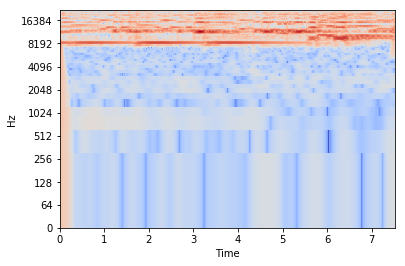

In [24]:
fmin = librosa.midi_to_hz(16)
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72)
logC = librosa.logamplitude(C)
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='log')
# librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

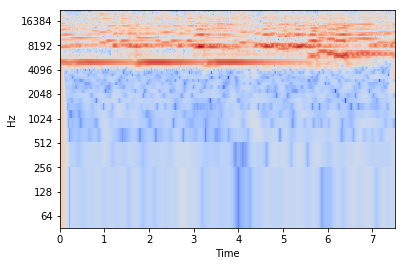

In [23]:
cqt = librosa.cqt(x, sr=sr)
logC = np.log10(abs(cqt))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note')
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='log')

In [22]:
help(librosa.display.specshow)

Help on function specshow in module librosa.display:

specshow(data, x_coords=None, y_coords=None, x_axis=None, y_axis=None, sr=22050, hop_length=512, fmin=None, fmax=None, bins_per_octave=12, **kwargs)
    Display a spectrogram/chromagram/cqt/etc.
    
    
    Parameters
    ----------
    data : np.ndarray [shape=(d, n)]
        Matrix to display (e.g., spectrogram)
    
    sr : number > 0 [scalar]
        Sample rate used to determine time scale in x-axis.
    
    hop_length : int > 0 [scalar]
        Hop length, also used to determine time scale in x-axis
    
    x_axis : None or str
    
    y_axis : None or str
        Range for the x- and y-axes.
    
        Valid types are:
    
        - None, 'none', or 'off' : no axis decoration is displayed.
    
        Frequency types:
    
        - 'linear', 'fft', 'hz' : frequency range is determined by
          the FFT window and sampling rate.
        - 'log' : the spectrum is displayed on a log scale.
        - 'mel' : frequen

In [21]:
cqt = librosa.cqt(y, sr=sr)
logC = np.log10(abs(cqt))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='log')

NameError: name 'y' is not defined